In [4]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,82.0,175.0,58.0,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,95.0,188.0,128.0,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,98.0,192.0,138.0,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,95.0,193.0,65.0,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,103.0,197.0,81.0,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,40.0,170.0,70.0,81.0,1.0,1.0,1.0,1.0,130.0,79.0,91.0,181.0,133.0,47.0,106.0,15.8,1.0,0.9,19.0,20.0,25.0,1.0,1.0
14996,14996,40.0,155.0,50.0,75.0,1.0,1.2,1.0,1.0,100.0,60.0,83.0,169.0,59.0,51.0,106.0,14.1,1.0,0.8,22.0,17.0,20.0,0.0,0.0
14997,14997,45.0,160.0,55.0,81.0,1.2,0.8,1.0,1.0,100.0,60.0,91.0,150.0,68.0,39.0,97.0,16.2,1.0,0.9,25.0,20.0,30.0,0.0,0.0
14998,14998,50.0,160.0,60.0,80.0,0.7,1.0,1.0,1.0,120.0,80.0,90.0,258.0,97.0,88.0,151.0,14.5,1.0,0.9,19.0,13.0,11.0,0.0,0.0


In [6]:
df_test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
df_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,59.0,100.0,179.0,122.0,45.0,109.0,16.0,1.0,1.0,15.0,9.0,25.0,0.0
1,15001,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,68.0,87.0,186.0,104.0,56.0,109.0,11.5,1.0,0.8,14.0,10.0,13.0,0.0
2,15002,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,64.0,93.0,167.0,84.0,77.0,74.0,13.3,1.0,0.8,14.0,10.0,11.0,0.0
3,15003,45.0,150.0,50.0,74.4,1.0,1.0,1.0,1.0,96.0,67.0,72.0,179.0,63.0,85.0,82.0,13.4,1.0,0.7,23.0,15.0,18.0,0.0
4,15004,35.0,185.0,80.0,90.0,0.8,1.0,1.0,1.0,113.0,73.0,82.0,183.0,89.0,59.0,105.0,15.6,1.0,0.9,16.0,26.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,25.0,170.0,70.0,85.0,0.6,0.7,1.0,1.0,106.0,63.0,93.0,178.0,50.0,60.0,108.0,14.9,1.0,1.0,23.0,16.0,22.0,0.0
9996,24996,55.0,175.0,70.0,85.0,0.7,1.2,1.0,1.0,138.0,80.0,94.0,162.0,171.0,54.0,73.0,16.3,1.0,0.9,13.0,8.0,18.0,0.0
9997,24997,45.0,155.0,50.0,74.6,0.5,0.4,1.0,1.0,106.0,60.0,95.0,169.0,163.0,52.0,84.0,14.4,1.0,0.9,20.0,16.0,26.0,0.0
9998,24998,45.0,160.0,55.0,74.0,1.0,1.2,1.0,1.0,107.0,70.0,89.0,219.0,52.0,92.0,118.0,12.2,1.0,0.8,17.0,9.0,11.0,0.0


In [7]:
X = df.drop(columns=['smoking'])
y = df['smoking']

# Train-test bo'linishi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
X.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

Model accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      2359
         1.0       0.68      0.79      0.73      1391

    accuracy                           0.78      3750
   macro avg       0.77      0.79      0.78      3750
weighted avg       0.80      0.78      0.79      3750



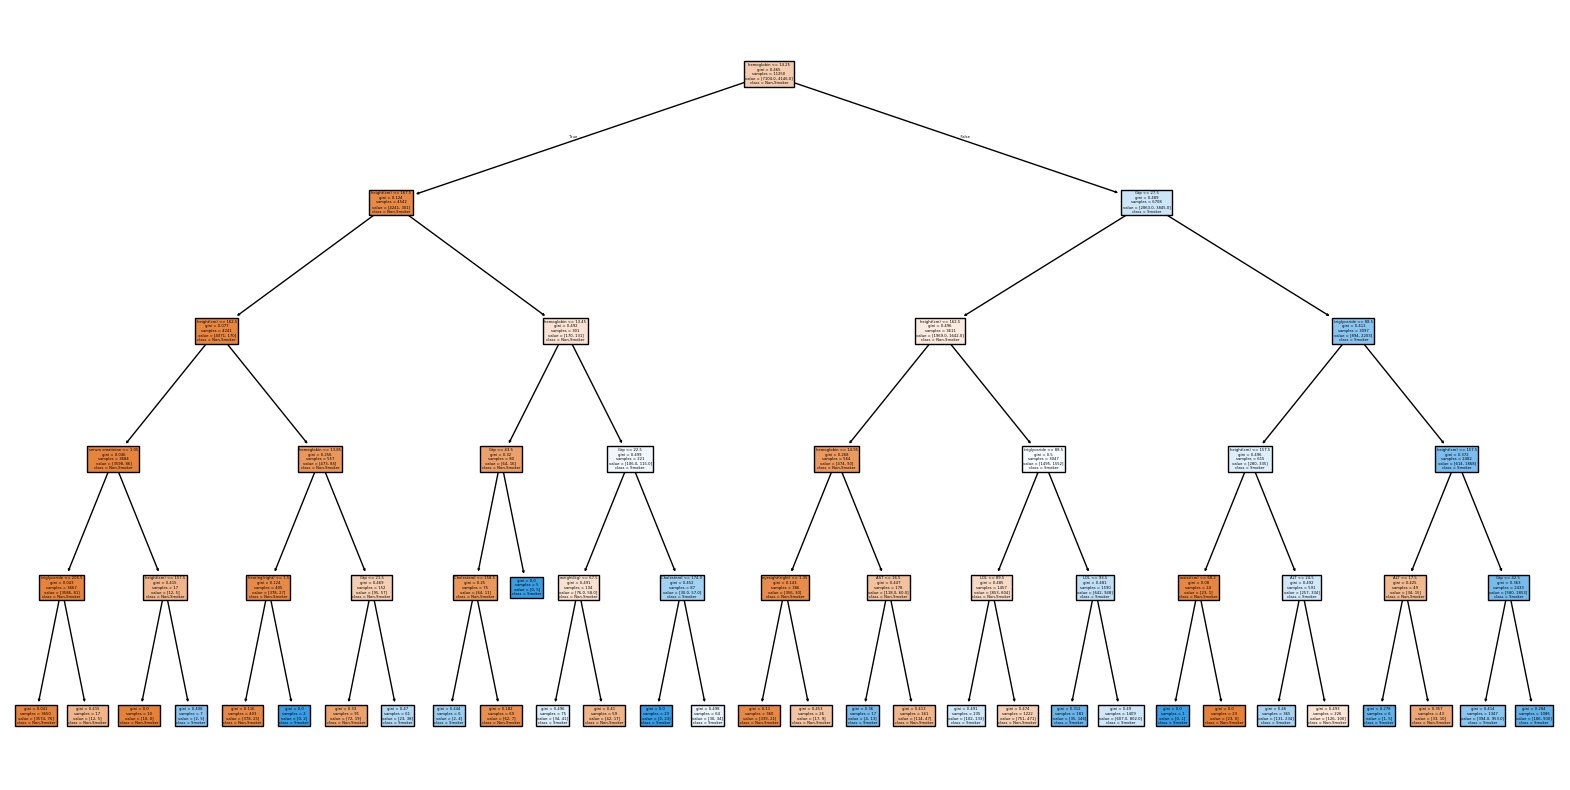

In [9]:
# Zarur kutubxonalarni yuklash
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Ma'lumotlarni yuklash (dataframe yaratish)
# Faraz qilamizki, df sizning ma'lumotlaringiz
# 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
# 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
# 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
# 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
# 'ALT', 'Gtp', 'dental caries' ustunlari va 'smoking' target ustuni bor deb qabul qilamiz

# Ma'lumotlarni o‘qish (agar CSV yoki boshqa formatda bo'lsa)
# df = pd.read_csv("your_data.csv")

# Feature va target ustunlarini ajratish


# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree modelini yaratish
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Modelni o‘rgatish (train)
clf.fit(X_train, y_train)

# Bashorat qilish (test ma'lumotlarida)
y_pred = clf.predict(X_test)

# Modelni baholash (aniqlik, classification report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# To'liq classification report
print(classification_report(y_test, y_pred))

# Qaror daraxtini chizish
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True)
plt.show()


ROC-AUC score: 0.88


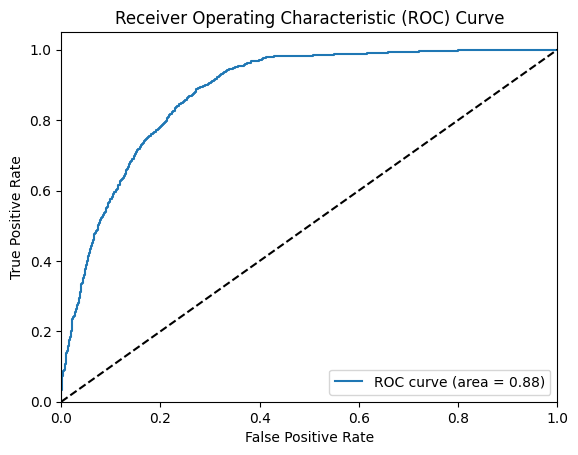

In [10]:
# Zarur kutubxonalarni yuklash
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ma'lumotlarni o‘qish (agar CSV yoki boshqa formatda bo'lsa)
# df = pd.read_csv("your_data.csv")

# Feature va target ustunlarini ajratish
# X = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', ...]]  # X mustaqil o'zgaruvchilar
# y = df['smoking']  # y target o'zgaruvchi

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest modelini yaratish
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Modelni o‘rgatish (train)
rf.fit(X_train, y_train)

# Bashorat qilish (test ma'lumotlarida ehtimolliklar)
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # faqat 'smoker' ehtimolliklarini olamiz

# ROC-AUC score hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score: {roc_auc:.2f}")

# ROC curve chizish
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal chiziq
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [11]:
# Qaror daraxti modelini yaratish
clf = RandomForestClassifier(max_depth=10, random_state=42)

# Parametrlar tarmog'ini belgilash (grid)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV ni yaratish
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Eng yaxshi parametrlarni topish uchun fit (o‘rgatish)
grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlarni chop etish
print("Eng yaxshi parametrlar: ", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Eng yaxshi parametrlar:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [12]:
# Eng yaxshi topilgan model bilan bashorat qilish
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Modelning aniqligini hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimallashtirilgan model accuracy: {accuracy:.2f}")


Optimallashtirilgan model accuracy: 0.79


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Ma'lumotlarni tayyorlash
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
# Decision Tree modelini yaratish
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Modelni o'rgatish
clf.fit(X_train, y_train)

# Bashoratlar
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Ikkilamchi sinfning ehtimollari (1-sinf)

# ROC-AUC qiymatini hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score: {roc_auc:.2f}")


ROC-AUC score: 0.84


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# GridSearchCV orqali topilgan eng yaxshi parametrlar
best_params = grid_search.best_params_

# Eng yaxshi parametrlar asosida model yaratish
best_clf = DecisionTreeClassifier(**best_params, random_state=42)

# Modelni o'rgatish
best_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]  # ROC-AUC uchun ehtimolliklar

# Aniqlikni hisoblash
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Best Parameters: {best_params}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Model accuracy: 0.73
ROC-AUC score: 0.72


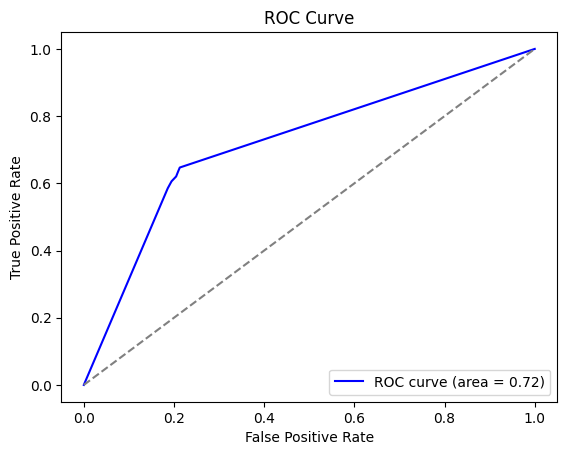

In [16]:
# ROC egrisi uchun false positive rate (FPR) va true positive rate (TPR) ni olish
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC egrisini chizish
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal chiziq
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [17]:
y_pred = best_clf.predict(df_test)
y_test_prob = best_clf.predict_proba(df_test)[:, 1]

In [18]:
subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("1_urinish.csv", index=False)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Model accuracy: 0.73
ROC-AUC score: 0.72
Kross-validatsiya ROC-AUC: 0.70 ± 0.04


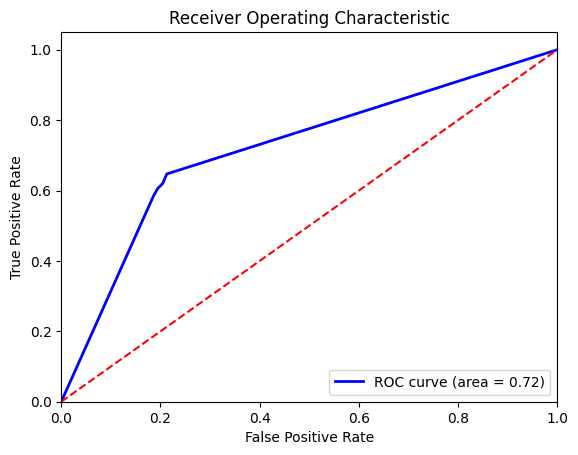

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# GridSearchCV orqali topilgan eng yaxshi parametrlar
best_params = grid_search.best_params_

# Eng yaxshi parametrlar asosida model yaratish
best_clf = DecisionTreeClassifier(**best_params, random_state=42)

# Modelni o'rgatish
best_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]  # ROC-AUC uchun ehtimolliklar

# Aniqlikni hisoblash
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Best Parameters: {best_params}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")

# Kross-validatsiya
cv_scores = cross_val_score(best_clf, X, y, cv=5, scoring='roc_auc')  # 5-fold kross-validatsiya
print(f"Kross-validatsiya ROC-AUC: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")  # O'rtacha va standart og'ish

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Boshqa modellarni aniqlang
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Voting Classifier yaratish
voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('decision_tree', decision_tree)], voting='soft')

# Modelni o'rgatish
voting_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Voting Classifier ROC-AUC score: {roc_auc:.2f}")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier ROC-AUC score: 0.84


In [21]:
from sklearn.ensemble import StackingClassifier

# Boshqa modellarni aniqlang
base_estimators = [
    ('log_reg', LogisticRegression(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(**best_params, random_state=42))
]

# Stacking Classifier yaratish
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Modelni o'rgatish
stacking_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = stacking_clf.predict(X_test)
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Stacking Classifier ROC-AUC score: {roc_auc:.2f}")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Stacking Classifier ROC-AUC score: 0.85


In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Boshqa modellarni aniqlang
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Pipeline yaratish
voting_clf = Pipeline(steps=[
    ('voting', VotingClassifier(estimators=[
        ('log_reg', log_reg), 
        ('decision_tree', decision_tree)
    ], voting='soft'))
])

# Modelni o'rgatish
voting_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Voting Classifier ROC-AUC score: {roc_auc:.2f}")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier ROC-AUC score: 0.84


In [23]:
y_pred = voting_clf.predict(df_test)
y_test_prob = best_clf.predict_proba(df_test)[:, 1]

subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob

subm['smoking'] = np.round(y_test_prob).astype(int)

# Yangi CSV faylini yozish
subm.to_csv("3_urinish.csv", index=False)

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# Boshqa modellarni aniqlang
base_estimators = [
    ('log_reg', LogisticRegression(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(**best_params, random_state=42))
]

# Stacking Pipeline yaratish
stacking_clf = Pipeline(steps=[
    ('stacking', StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression()))
])

# Modelni o'rgatish
stacking_clf.fit(X_train, y_train)

# Test ma'lumotlarida bashorat qilish
y_pred = stacking_clf.predict(X_test)
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Stacking Classifier ROC-AUC score: {roc_auc:.2f}")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Stacking Classifier ROC-AUC score: 0.85


In [25]:
import optuna
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Hyperparameterlar uchun tavsiyalar
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    # Modellarni yaratish
    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    log_reg = LogisticRegression(random_state=42)
    
    # Voting Classifier
    voting_clf = VotingClassifier(estimators=[('dt', dt), ('log_reg', log_reg)], voting='soft')
    
    # Kross-valyatsiya
    score = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='roc_auc')
    return score.mean()

# Optuna uchun studiyani yaratish
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")

# Eng yaxshi parametrlar bilan model yaratish
best_params = study.best_params

dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], random_state=42)
log_reg = LogisticRegression(random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('dt', dt), ('log_reg', log_reg)], voting='soft')
voting_clf.fit(X_train, y_train)

# Test to'plamida baholash
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score with Optuna: {roc_auc:.2f}")


[I 2024-10-25 15:36:55,072] A new study created in memory with name: no-name-2e36c342-a9cb-4d80-893a-de395aa3ae21
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

Best Parameters: {'max_depth': 5, 'min_samples_split': 7}
ROC-AUC score with Optuna: 0.87


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
import optuna
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Random Forest hyperparameterlari uchun tavsiyalar
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth_rf = trial.suggest_int('max_depth_rf', 2, 10)
    min_samples_split_rf = trial.suggest_int('min_samples_split_rf', 2, 10)

    # Decision Tree hyperparameterlari uchun tavsiyalar
    max_depth_dt = trial.suggest_int('max_depth_dt', 2, 10)
    min_samples_split_dt = trial.suggest_int('min_samples_split_dt', 2, 10)

    # Modellarni yaratish
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                max_depth=max_depth_rf, 
                                min_samples_split=min_samples_split_rf, 
                                random_state=42)
    dt = DecisionTreeClassifier(max_depth=max_depth_dt, 
                                min_samples_split=min_samples_split_dt, 
                                random_state=42)
    
    log_reg = LogisticRegression(random_state=42)

    # Voting Classifier
    voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('log_reg', log_reg)], voting='soft')
    
    # Kross-valyatsiya
    score = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='roc_auc')
    return score.mean()

# Optuna uchun studiyani yaratish
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Parameters: {study.best_params}")


[I 2024-10-25 15:37:34,764] A new study created in memory with name: no-name-ee0151a5-4509-4109-b52e-60757d289600
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

Best Parameters: {'n_estimators': 87, 'max_depth_rf': 10, 'min_samples_split_rf': 7, 'max_depth_dt': 6, 'min_samples_split_dt': 4}


In [27]:
# Eng yaxshi parametrlar bilan model yaratish
best_params = study.best_params

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                            max_depth=best_params['max_depth_rf'], 
                            min_samples_split=best_params['min_samples_split_rf'], 
                            random_state=42)
dt = DecisionTreeClassifier(max_depth=best_params['max_depth_dt'], 
                            min_samples_split=best_params['min_samples_split_dt'], 
                            random_state=42)

log_reg = LogisticRegression(random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt), ('log_reg', log_reg)], voting='soft')
voting_clf.fit(X_train, y_train)

# Test to'plamida baholash
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# ROC-AUC hisoblash
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score with Optuna: {roc_auc:.2f}")

y_pred = voting_clf.predict(df_test)
y_test_prob = best_clf.predict_proba(df_test)[:, 1]

subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("5_urinish.csv", index=False)


ROC-AUC score with Optuna: 0.88


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred = voting_clf.predict(df_test)
y_test_prob = best_clf.predict_proba(df_test)[:, 1]

subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("4_urinish.csv", index=False)

[I 2024-10-25 15:42:25,552] A new study created in memory with name: no-name-aa5d7597-1b4e-4c69-b278-3cde473b4eb8
[I 2024-10-25 15:42:28,865] Trial 0 finished with value: 0.8847529039692167 and parameters: {'n_estimators': 129, 'max_depth': 28, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.8847529039692167.
[I 2024-10-25 15:42:39,110] Trial 1 finished with value: 0.8790946962578235 and parameters: {'n_estimators': 76, 'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.8847529039692167.
[I 2024-10-25 15:42:42,644] Trial 2 finished with value: 0.8808978717830437 and parameters: {'n_estimators': 222, 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 0 with value: 0.8847529039692167.
[I 2024-10-25 15:42:46,386] Trial 3 finished with value: 0.8834962099855918 and parameters: {'n_estimators': 204, 'max_depth': 14, 'm

Best parameters found by Optuna: {'n_estimators': 180, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best AUC score achieved: 0.887504532261157
Final Model Accuracy: 0.8026666666666666
Final Model ROC AUC Score: 0.887504532261157


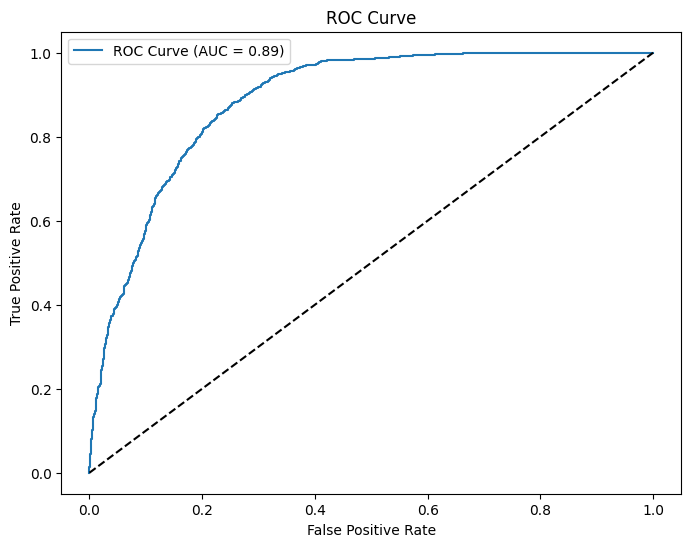

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna
X = df.drop('smoking', axis=1)  
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    return auc_score  
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best parameters found by Optuna:", study.best_params)
print("Best AUC score achieved:", study.best_value)
best_params = study.best_params
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)
y_prob = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("Final Model ROC AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


y_pred = voting_clf.predict(df_test)
y_test_prob = best_clf.predict_proba(df_test)[:, 1]

subm = pd.read_csv("sample_submission.csv")
subm['smoking'] = y_test_prob
subm.to_csv("6_urinish.csv", index=False)